### Imports

In [98]:
from keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array
import numpy as np
from skimage.transform import resize
from matplotlib import pyplot as plt
from PIL import Image

### Set up the data generators

In [91]:
gen_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
    rescale=1/255
)

gen_no_aug = ImageDataGenerator(rescale=1/255)

### Demonstrate the data generator with a single image

In [121]:
# load the image
img = load_img("data/cat/cat.0.jpg")
# convert it to an array
x = img_to_array(img)
# convert its value between 0 and 1 as required for skimage.transform.resize()
x = x / 255
# resize the image
x = resize(x, (150,150))
# reshape the image for keras.preprocessing.image.ImageDataGenerator()
x = x.reshape((1,) + x.shape)
# convert values between 0 and 255 as keras.preprocessing.image.ImageDataGenerator() expects from raw images
x = x*255 

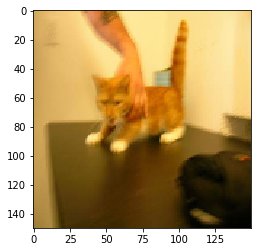

In [122]:
# show the raw image
plt.imshow(x[0]/255)
plt.show()

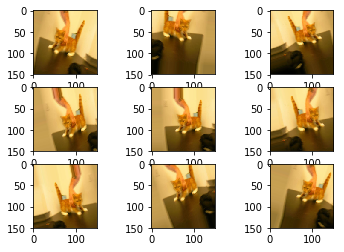

In [123]:
# the generated images
x_gen_iter = gen_aug.flow(x)

i = 0
while i <= 8:
    batch = x_gen_iter.next()
    plt.subplot(3, 3 , i+1)
    plt.imshow(batch[0])
    i += 1
plt.show()

### Show one batch of training data

In [92]:
train_generator = gen_aug.flow_from_directory("data/", target_size=(150, 150))

Found 25000 images belonging to 2 classes.


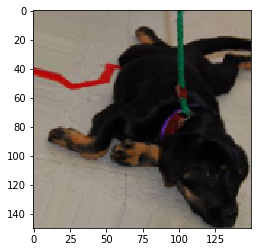

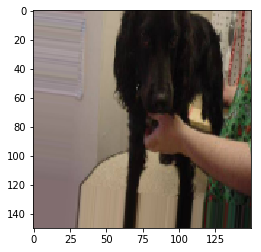

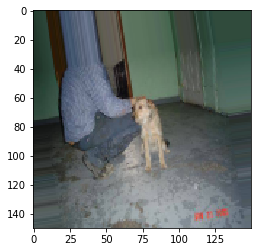

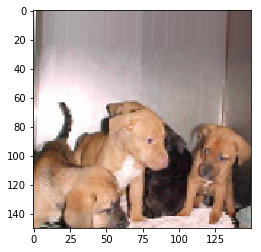

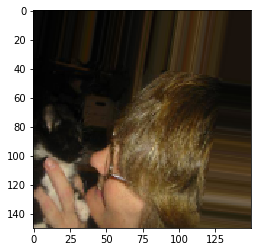

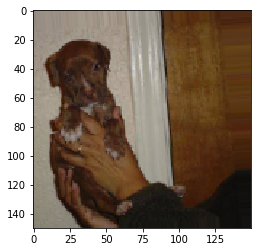

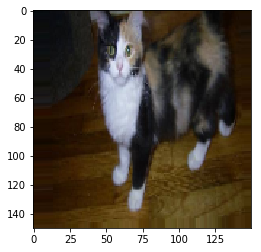

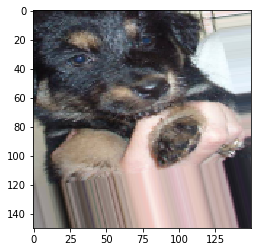

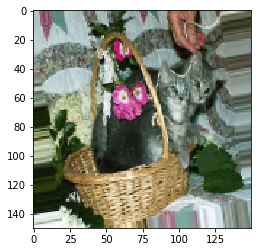

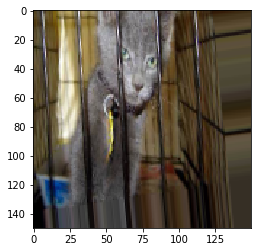

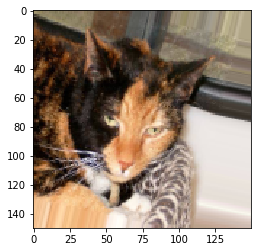

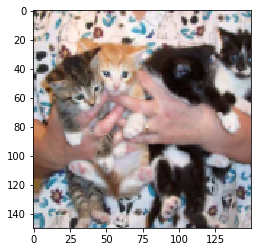

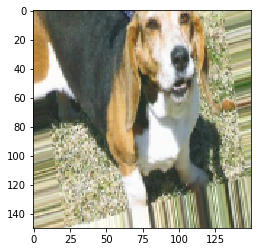

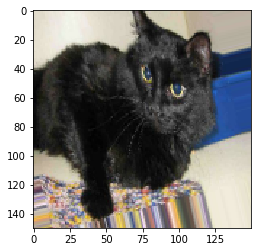

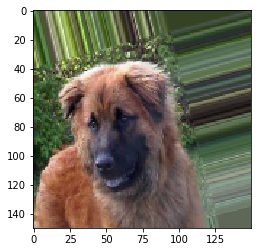

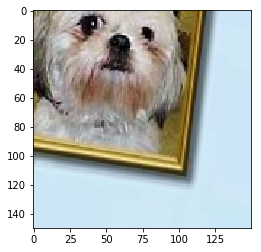

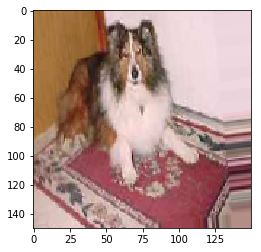

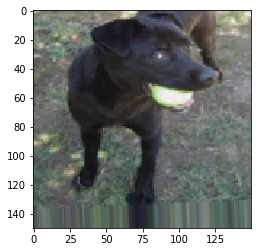

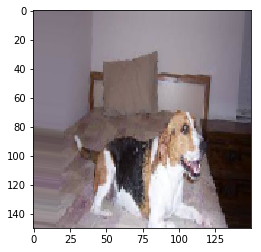

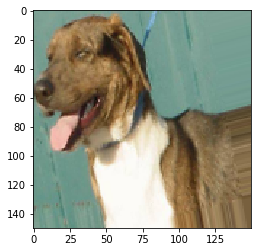

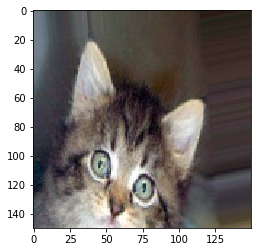

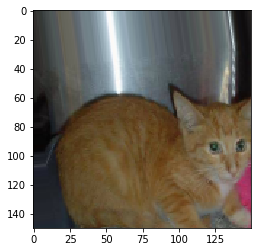

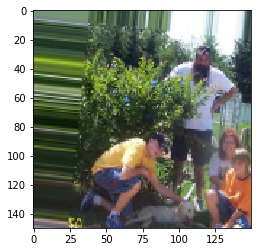

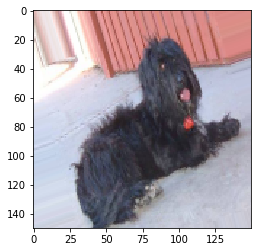

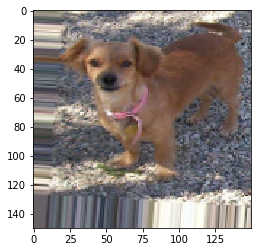

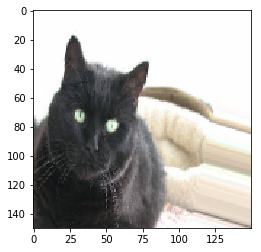

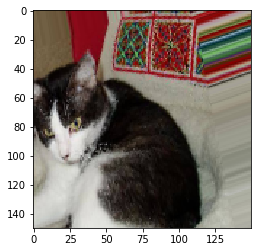

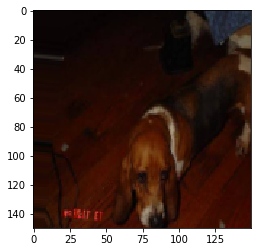

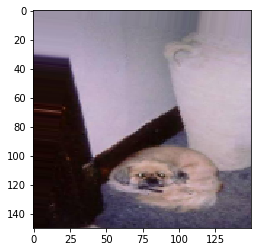

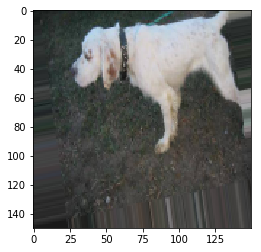

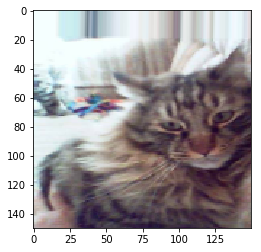

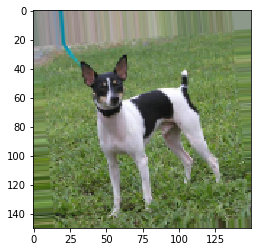

In [128]:
batch = train_generator.next()

for img in batch[0]:
    plt.imshow(img)
    plt.show()